# Calculate Disperser transmission for simulation

- author Sylvie Dagoret-Campagne
- creation date : May 2018
- affliliation : CNRS/IN2P3
- project : DESC-LSST

## Setup

### import

In [275]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [276]:
import seaborn as sns

In [277]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Figure style

In [278]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [279]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Initialisation

### Spectractor

In [280]:
PATH_SPECTRACTOR='../../Spectractor'
PATH_SPECTRACTORSIM='../../SpectractorSim'
PATH_SPECTRACTORANAATM='../../SpectractorAnaAtm/common_tools'
PATH_GMAOMERRA='../merra2'

In [281]:
sys.path.append(PATH_SPECTRACTOR)
sys.path.append(PATH_SPECTRACTORSIM)
sys.path.append(PATH_SPECTRACTORANAATM)
sys.path.append(PATH_GMAOMERRA)

In [282]:
from spectractorsim import *
from libspecana import *

thrpt_SimClearSky.csv
thrpt_AverClearSky.csv	
thrpt_Merra2Sky.csv	

thrpt_Ron400.csv
thrpt_Thor300.csv
thrpt_HoloPhP.csv	
thrpt_HoloPhAg.csv	
thrpt_HoloAmAg.csv	

In [283]:
all_files_30may17=["thrpt_Ron400.csv","thrpt_Thor300.csv","thrpt_HoloPhP.csv","thrpt_HoloPhAg.csv","thrpt_HoloAmAg.csv",
           "thrpt_SimClearSky.csv","thrpt_SimAverSky.csv","thrpt_SimMerra2Sky.csv"]

In [284]:
topdir="data"

In [285]:
subdir="30may17/HD111980"

In [286]:
path=os.path.join(topdir,subdir)

In [287]:
def GetLogDisperserTransm(thefile):
    df=pd.read_csv(thefile)
    
    X=df["wl"].values
    Y=df["thrpt"].values
    good_indexes=np.where(Y!=0)[0]
    X=X[good_indexes]
    Y=Y[good_indexes]
    return X,Y

In [288]:
def Extrapolate(X,Y):
    # extrapolate X and Y
    YMIN=Y.min()-1.
    X=np.insert(X,0,X[0]-1)
    X=np.insert(X,0,WL[0])
    X=np.append(X,WL[-1])
 
    Y=np.insert(Y,0,YMIN)
    Y=np.insert(Y,0,YMIN)
    Y=np.append(Y,YMIN)
    return X,Y

In [289]:
def GetLinearDisperserTrans(X,Y):
    X,Y=Extrapolate(X,Y)
    indexes=np.argsort(X)
    X=X[indexes]
    Y=Y[indexes]
    Y=smooth(Y,window_len=11)
    
    if(len(Y)>len(X)):
        Y=np.delete(Y, -1)
    elif(len(X)>len(Y)):
        X=np.delete(X, -1)
        
    
    print len(X),len(Y)
    func = interpolate.interp1d(X, Y)   
    newY=np.power(10.,func(WL)/2.5)
    return WL,newY

# Simulation

In [290]:
tel=TelescopeTransmission()
trans=tel.load_transmission()

In [291]:
tr=trans(WL)

In [292]:
thefilename1=os.path.join(path,all_files_30may17[5])
X1s,Y1s=GetLogDisperserTransm(thefilename1)

In [293]:
X0=X1s
Y0=Y1s

In [294]:
newX0,newY0=GetLinearDisperserTrans(X0,Y0)

79 79


In [295]:
thefilename2=os.path.join(path,all_files_30may17[6])
X2s,Y2s=GetLogDisperserTransm(thefilename2)

In [296]:
thefilename3=os.path.join(path,all_files_30may17[7])
X3s,Y3s=GetLogDisperserTransm(thefilename3)

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5,1,'Optical Throughput in simulation')

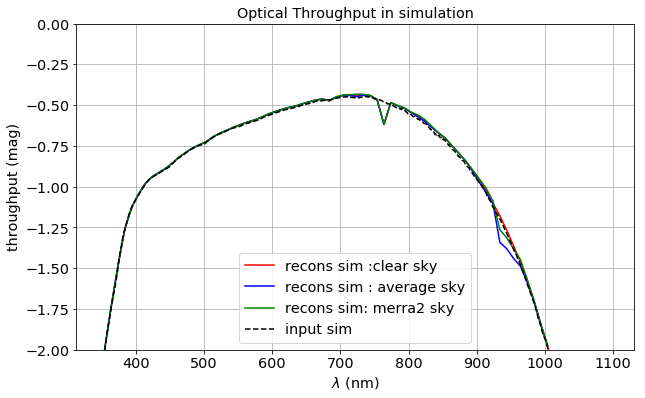

In [297]:
plt.plot(X1s,Y1s,'r-',label='recons sim :clear sky')
plt.plot(X2s,Y2s,'b-',label='recons sim : average sky')
plt.plot(X3s,Y3s,'g-',label='recons sim: merra2 sky')
plt.plot(WL,2.5*np.log10(tr),'k--',label='input sim')
plt.grid(True)
plt.ylim(-2.,0.)
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title("Optical Throughput in simulation")

Text(0.5,1,'Optical Throughput in simulation')

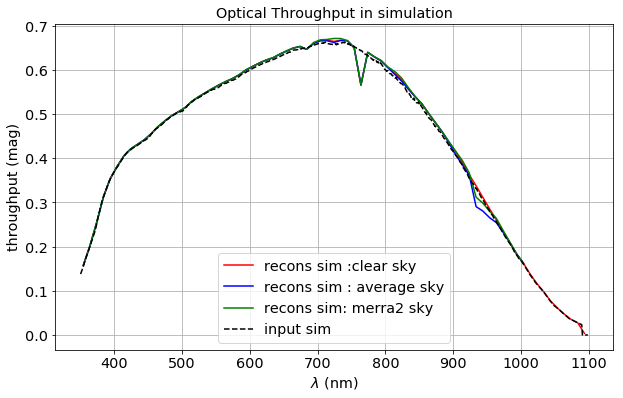

In [298]:
plt.plot(X1s,np.power(10.,Y1s/2.5),'r-',label='recons sim :clear sky')
plt.plot(X2s,np.power(10.,Y2s/2.5),'b-',label='recons sim : average sky')
plt.plot(X3s,np.power(10.,Y3s/2.5),'g-',label='recons sim: merra2 sky')
plt.plot(WL,tr,'k--',label='input sim')
plt.grid(True)
#plt.ylim(-2.,0.)
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title("Optical Throughput in simulation")

# Ronchi400

In [299]:
thefilename=os.path.join(path,all_files_30may17[0])

In [300]:
X1,Y1=GetLogDisperserTransm(thefilename)

In [301]:
thetitle="Optical Throughput for Ronchi400"

2018-05-17 16:39:58  matplotlib.legend _parse_legend_args   WARNING No handles with labels found to put in legend.


Text(0.5,1,'Optical Throughput for Ronchi400')

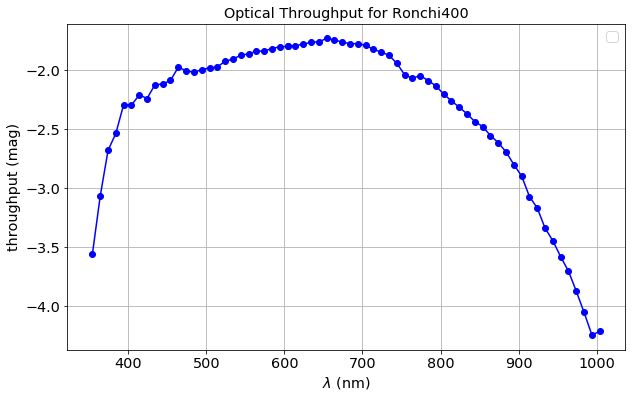

In [302]:
plt.plot(X1,Y1,'bo-')
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

In [303]:
newX1,newY1=GetLinearDisperserTrans(X1,Y1)

70 70


Text(0.5,1,'Optical Throughput for Ronchi400')

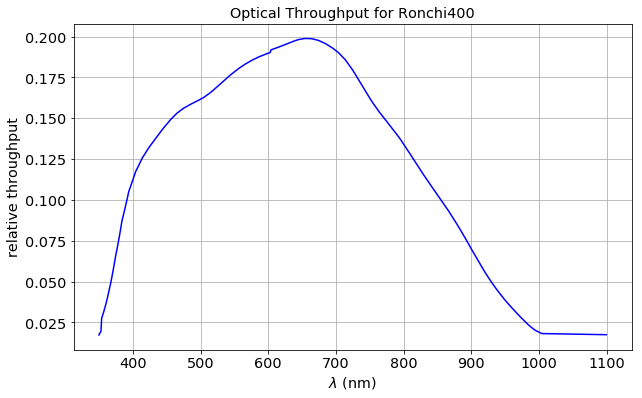

In [304]:
plt.plot(newX1,newY1,'b-')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("relative throughput")
plt.title(thetitle)

# ThorLab

In [305]:
thefilename=os.path.join(path,all_files_30may17[1])

In [306]:
X2,Y2=GetLogDisperserTransm(thefilename)

In [307]:
thetitle="Optical Throughput for Thor300"

2018-05-17 16:39:59  matplotlib.legend _parse_legend_args   WARNING No handles with labels found to put in legend.


Text(0.5,1,'Optical Throughput for Thor300')

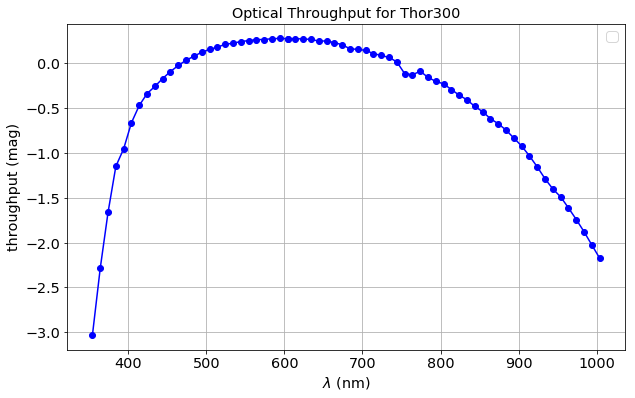

In [308]:
plt.plot(X2,Y2,'bo-')
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

In [309]:
newX2,newY2=GetLinearDisperserTrans(X2,Y2)

70 70


Text(0.5,1,'Optical Throughput for Thor300')

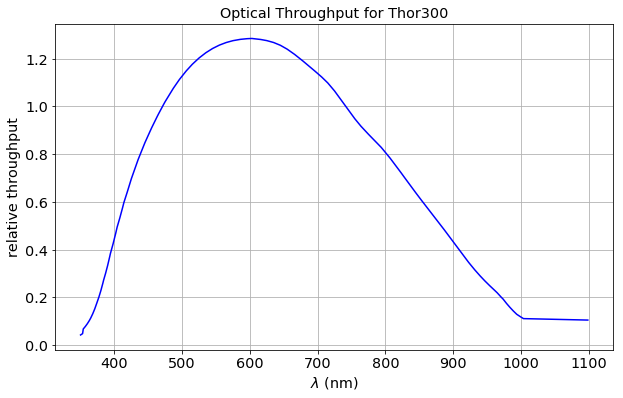

In [310]:
plt.plot(newX2,newY2,'b-')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("relative throughput")
plt.title(thetitle)

# HoloPhP

In [311]:
thefilename=os.path.join(path,all_files_30may17[2])

In [312]:
X3,Y3=GetLogDisperserTransm(thefilename)

In [313]:
thetitle="Optical Throughput for HoloPhP"

2018-05-17 16:40:00  matplotlib.legend _parse_legend_args   WARNING No handles with labels found to put in legend.


Text(0.5,1,'Optical Throughput for HoloPhP')

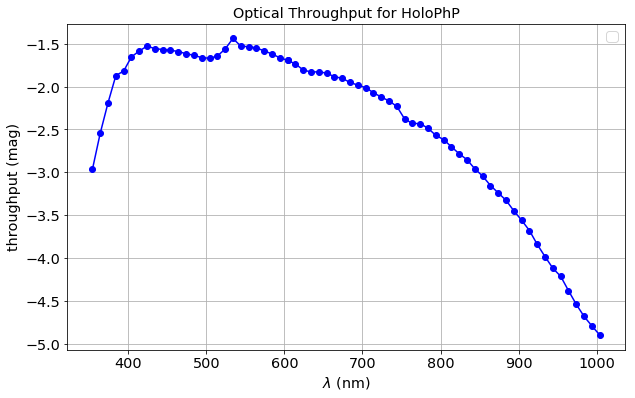

In [314]:
plt.plot(X3,Y3,'bo-')
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

In [315]:
newX3,newY3=GetLinearDisperserTrans(X3,Y3)

70 70


Text(0.5,1,'Optical Throughput for HoloPhP')

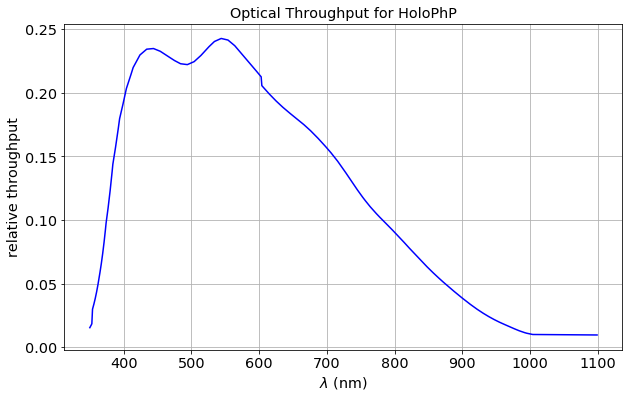

In [316]:
plt.plot(newX3,newY3,'b-')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("relative throughput")
plt.title(thetitle)

# HoloPhAg

In [317]:
thefilename=os.path.join(path,all_files_30may17[3])

In [318]:
X4,Y4=GetLogDisperserTransm(thefilename)

In [319]:
thetitle="Optical Throughput for HoloPhAg"

2018-05-17 16:40:01  matplotlib.legend _parse_legend_args   WARNING No handles with labels found to put in legend.


Text(0.5,1,'Optical Throughput for HoloPhAg')

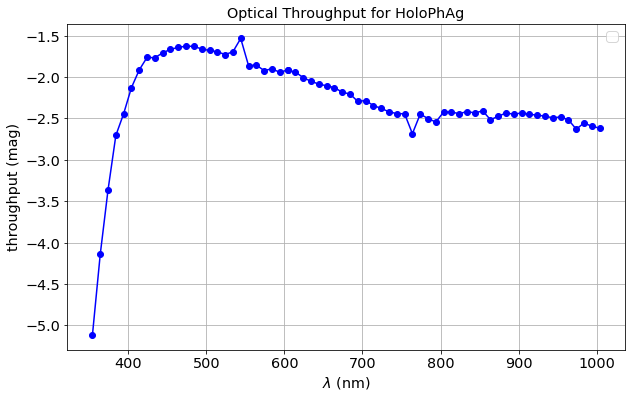

In [320]:
plt.plot(X4,Y4,'bo-')
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

In [321]:
newX4,newY4=GetLinearDisperserTrans(X4,Y4)

70 70


Text(0.5,1,'Optical Throughput for HoloPhAg')

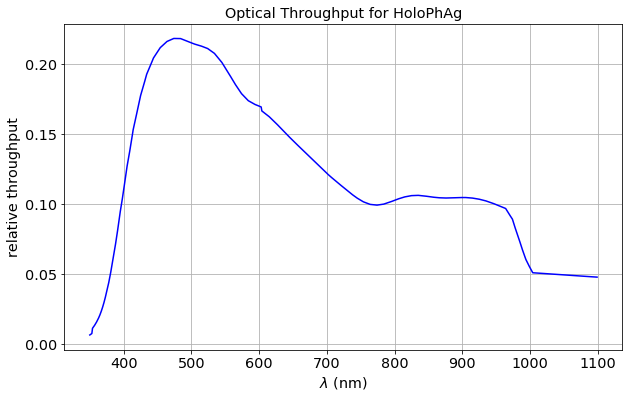

In [322]:
plt.plot(newX4,newY4,'b-')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("relative throughput")
plt.title(thetitle)

# HoloAmAg

In [323]:
thefilename=os.path.join(path,all_files_30may17[4])

In [324]:
thefilename

'data/30may17/HD111980/thrpt_HoloAmAg.csv'

In [325]:
X5,Y5=GetLogDisperserTransm(thefilename)

In [326]:
thetitle="Optical Throughput for HoloAmAg"

2018-05-17 16:40:02  matplotlib.legend _parse_legend_args   WARNING No handles with labels found to put in legend.


Text(0.5,1,'Optical Throughput for HoloAmAg')

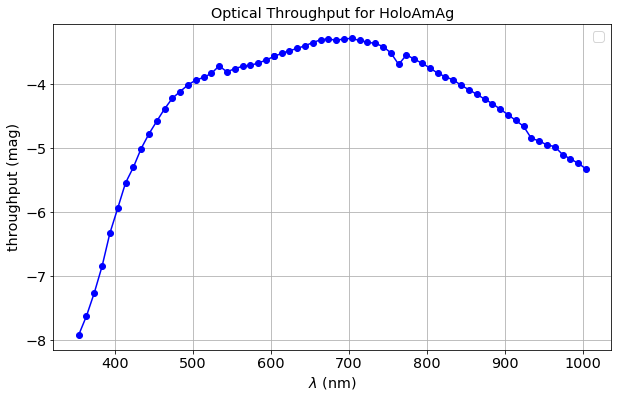

In [327]:
plt.plot(X5,Y5,'bo-')
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

In [328]:
newX5,newY5=GetLinearDisperserTrans(X5,Y5)

70 70


Text(0.5,1,'Optical Throughput for HoloAmAg')

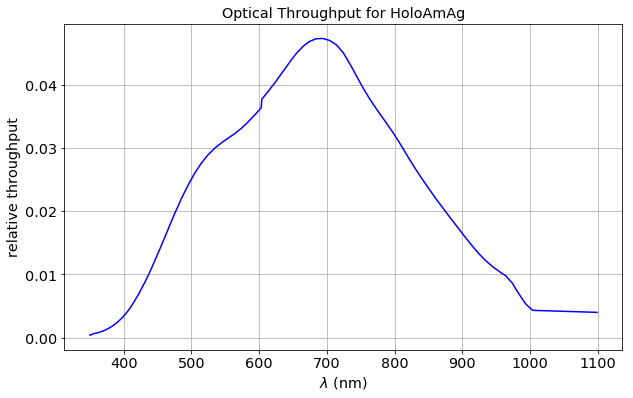

In [329]:
plt.plot(newX5,newY5,'b-')
plt.grid()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("relative throughput")
plt.title(thetitle)

In [330]:
df=pd.DataFrame()

In [331]:
df["wl"]=WL
df["thrpt_ron400"]=newY1
df["thrpt_thor300"]=newY2
df["thrpt_holoPhP"]=newY3
df["thrpt_holoPhAg"]=newY4
df["thrpt_holoAmAg"]=newY5

In [332]:
df.head()

,wl,thrpt_ron400,thrpt_thor300,thrpt_holoPhP,thrpt_holoPhAg,thrpt_holoAmAg
0,350,0.017344,0.042159,0.015511,0.006453,0.000430
1,351,0.018088,0.043970,0.016475,0.006781,0.000443
2,352,0.018864,0.045858,0.017499,0.007126,0.000456
3,353,0.019673,0.047827,0.018586,0.007489,0.000469
4,354,0.027546,0.067376,0.030035,0.011240,0.000599


In [333]:
df.to_csv("disp_thrpt_300517_hd111980.csv")

# Disperser comparison

Text(0.5,1,'comparison of optical throughput')

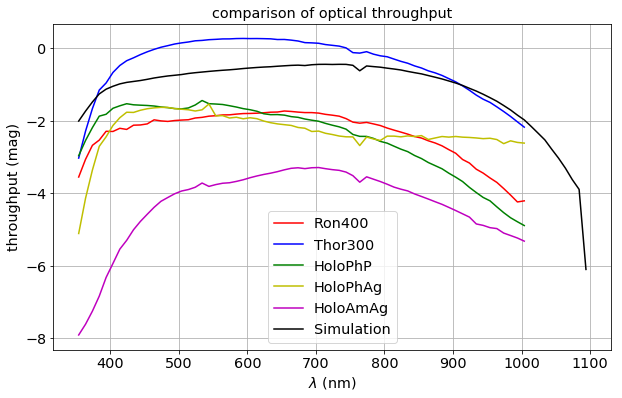

In [334]:
thetitle="comparison of optical throughput"
plt.plot(X1,Y1,'r-',label='Ron400')
plt.plot(X2,Y2,'b-',label='Thor300')
plt.plot(X3,Y3,'g-',label='HoloPhP')
plt.plot(X4,Y4,'y-',label='HoloPhAg')
plt.plot(X5,Y5,'m-',label='HoloAmAg')
plt.plot(X0,Y0,'k-',label='Simulation')
plt.legend()
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput (mag)")
plt.title(thetitle)

Text(0.5,1,'comparison of optical throughput')

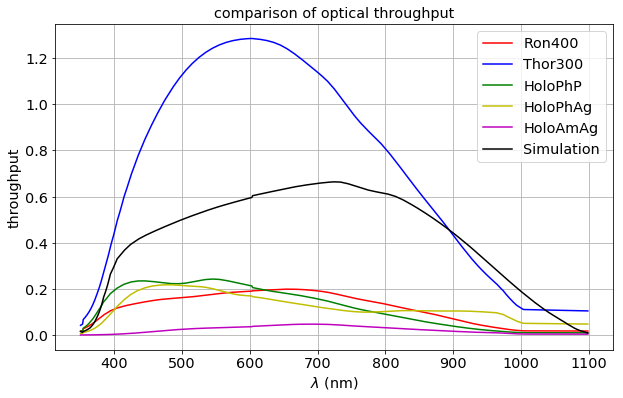

In [335]:
thetitle="comparison of optical throughput"
plt.plot(newX1,newY1,'r-',label='Ron400')
plt.plot(newX2,newY2,'b-',label='Thor300')
plt.plot(newX3,newY3,'g-',label='HoloPhP')
plt.plot(newX4,newY4,'y-',label='HoloPhAg')
plt.plot(newX5,newY5,'m-',label='HoloAmAg')
plt.plot(newX0,newY0,'k-',label='Simulation')
plt.legend()
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("throughput")
plt.title(thetitle)